In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append('../src')
sys.path.append('../data')
import  semantic_analysis, vis_sentiment #, helper
import os

In [3]:

# Define the path
base_path = r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA"

# Loop through years from 2014 to 2019
for year in range(2014, 2017):

    file_path = os.path.join(base_path, f"fox_{year}_output.csv")
    
    # Check if the file exists for the given year
    if os.path.exists(file_path):
        # Read the CSV file
        #semantic_analysis.lexicon_nltk(file_path)
        semantic_scores_lexicon = semantic_analysis.roberta_semantic_algorithm_twitter(file_path)
        
        print(f"File saved for year {year}")
    else:
        print(f"No file found for year {year}")
#'''

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


File saved for year 2014


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


File saved for year 2015


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


File saved for year 2016


In [3]:
base_path = r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\SEMANTICS"
# Loop through years from 2014 to 2019
for year in range(2014, 2020):
    file_path = os.path.join(base_path, f"cnn_{year}_semantics.csv")
    df = pd.read_csv(file_path)
    print(f'Classification in CNN {year}:\n', df['Semantic roberta twitter'].value_counts())
    

Classification in CNN 2014:
 negative    2
neutral     2
positive    1
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2015:
 neutral     13028
negative     6898
positive     1510
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2016:
 neutral     14410
negative     7278
positive     1526
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2017:
 neutral     16414
negative     7195
positive     1439
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2018:
 neutral     18736
negative     8207
positive     1829
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2019:
 neutral     24502
negative     9784
positive     3418
Name: Semantic roberta twitter, dtype: int64


In [ ]:
for year in range(2014, 2017):
    file_path = os.path.join(base_path, f"fox_{year}_semantics.csv")
    df = pd.read_csv(file_path)
    print(f'Classification in fox {year}:\n', df['Semantic roberta twitter'].value_counts())

Classification in fox 2014:
 neutral     7541
negative    2852
positive    1142
Name: Semantic roberta twitter, dtype: int64
Classification in fox 2015:
 neutral     9658
negative    4254
positive    1831
Name: Semantic roberta twitter, dtype: int64
Classification in fox 2016:
 neutral     9735
negative    5535
positive    1797
Name: Semantic roberta twitter, dtype: int64


In [2]:
large_file_path = r'C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_word2vec.csv'

large_df = pd.read_csv(large_file_path)

In [3]:
large_df = semantic_analysis.merge_data(large_df, data_df, column = 'Semantic roberta twitter' )
large_df = large_df.drop('Text', axis=1)
large_df.to_csv(r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_and_semantics.csv")
print(large_df.isna().sum())

NameError: name 'data_df' is not defined

neutral     139326
negative     50262
positive     14106
Name: Semantic roberta twitter, dtype: int64
neutral     59182
positive    47959
negative    14621
Name: Semantic roberta twitter, dtype: int64
neutral     50810
positive    34706
negative     8374
Name: Semantic roberta twitter, dtype: int64


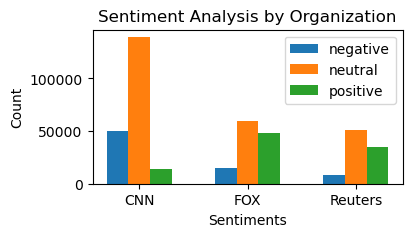

In [2]:
master_file_df = pd.read_csv(r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_and_semantics.csv")
vis_sentiment.sentiment_count_graph(master_file_df)